In [ ]:
import numpy as np
import pandas as pd
import sklearn
import time
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import sys
import numpy
import os
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
numpy.set_printoptions(threshold=sys.maxsize)

In [ ]:
pwd

'/content'

In [ ]:
cd drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks'

In [ ]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "CNN images"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],  # minus 1 because 1,2,3,4
                                100*np.max(predictions_array),
                                class_names[true_label]), # minus 1 because 1,2,3,4
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(4))
  plt.yticks([])
  thisplot = plt.bar(range(4), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



Epoch 1/70
118/118 [==============================] - 2s 7ms/step - loss: 1.1058 - accuracy: 0.4640 - val_loss: 0.7615 - val_accuracy: 0.6634
Epoch 2/70
118/118 [==============================] - 1s 6ms/step - loss: 0.7749 - accuracy: 0.6551 - val_loss: 0.6671 - val_accuracy: 0.7148
Epoch 3/70
118/118 [==============================] - 1s 6ms/step - loss: 0.7309 - accuracy: 0.6822 - val_loss: 0.6633 - val_accuracy: 0.7204
Epoch 4/70
118/118 [==============================] - 1s 6ms/step - loss: 0.6739 - accuracy: 0.7149 - val_loss: 0.6909 - val_accuracy: 0.6913
Epoch 5/70
118/118 [==============================] - 1s 6ms/step - loss: 0.6224 - accuracy: 0.7393 - val_loss: 0.5946 - val_accuracy: 0.7601
Epoch 6/70
118/118 [==============================] - 1s 9ms/step - loss: 0.5780 - accuracy: 0.7707 - val_loss: 0.5969 - val_accuracy: 0.7619
Epoch 7/70
118/118 [==============================] - 1s 9ms/step - loss: 0.5596 - accuracy: 0.7800 - val_loss: 0.4819 - val_accuracy: 0.8338
Epoch 

<ipython-input-63-6ed8fa5df9f6>:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


Saving figure Training and validation accuracy for 64 x 64 at 9_20 with four classes
51/51 - 0s - loss: 3.1606 - accuracy: 0.7080 - 200ms/epoch - 4ms/step
51/51 [==============================] - 0s 3ms/step
Saving figure Confusion matrix for 64 x 64 at 9_20 with four classes
                 precision    recall  f1-score   support

        rainfed       0.79      0.81      0.80       424
fully irrigated       0.83      0.82      0.82       399
percent deficit       0.60      0.63      0.62       404
     time delay       0.60      0.56      0.58       386

       accuracy                           0.71      1613
      macro avg       0.71      0.71      0.71      1613
   weighted avg       0.71      0.71      0.71      1613

Epoch 1/70
118/118 [==============================] - 6s 29ms/step - loss: 0.9763 - accuracy: 0.5621 - val_loss: 0.7907 - val_accuracy: 0.6466
Epoch 2/70
118/118 [==============================] - 3s 22ms/step - loss: 0.7821 - accuracy: 0.6598 - val_loss: 0.7877 -

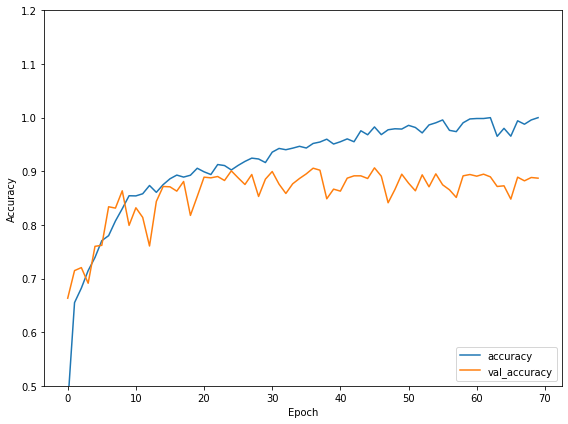

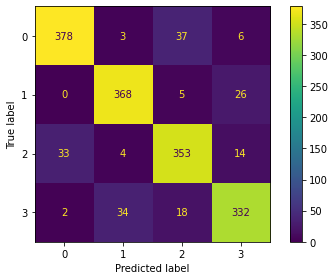

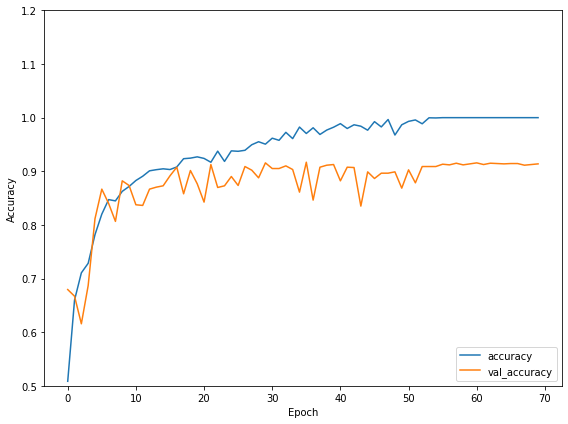

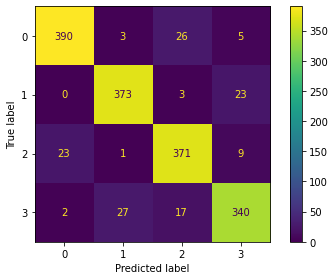

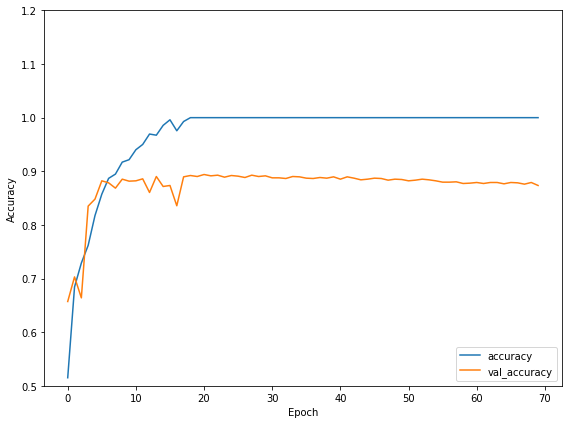

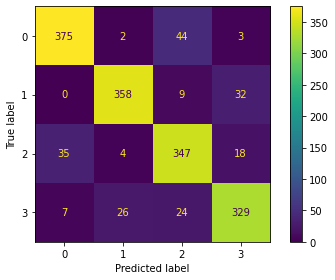

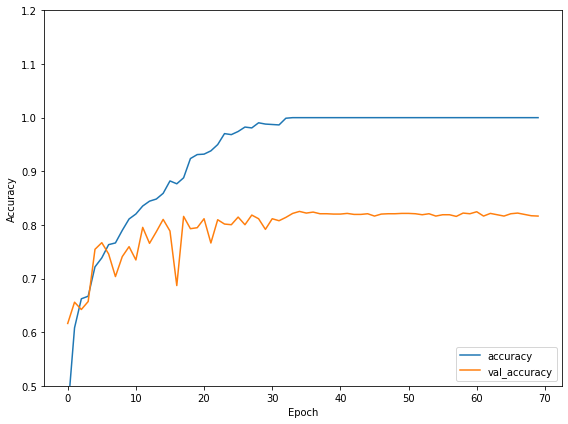

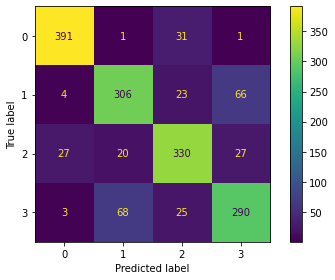

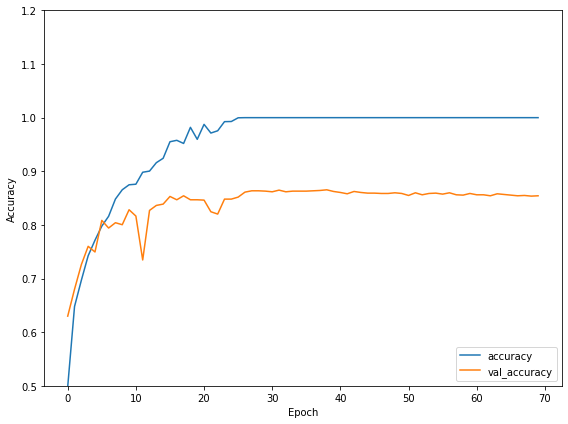

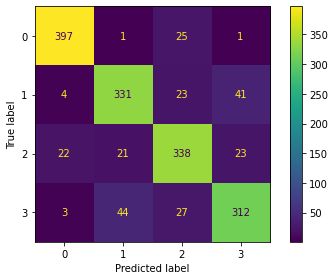

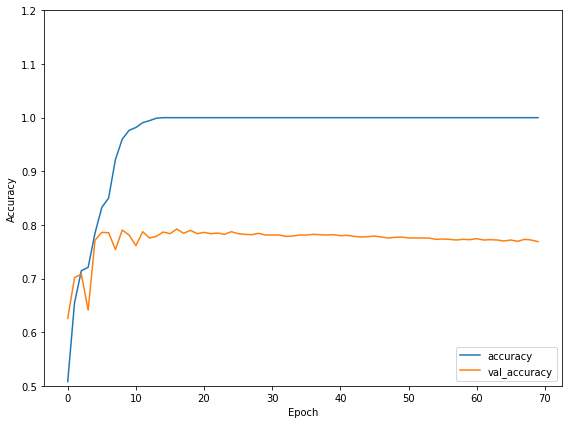

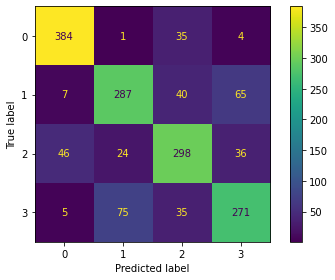

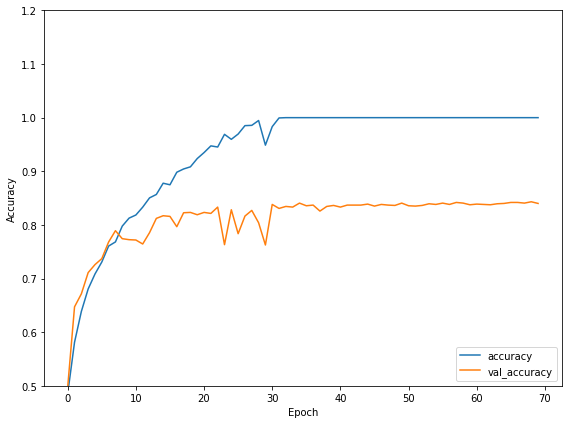

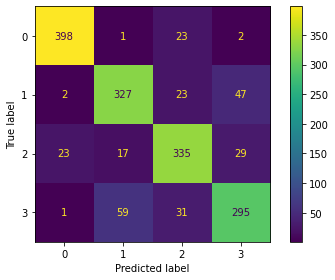

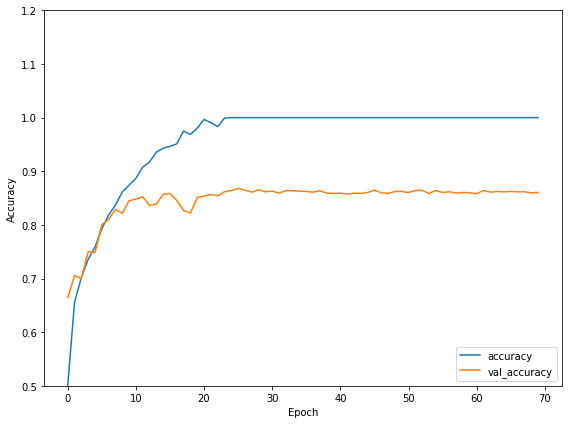

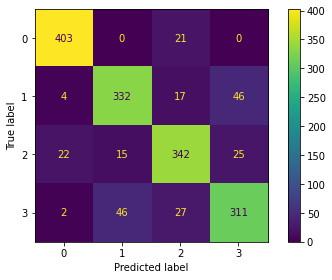

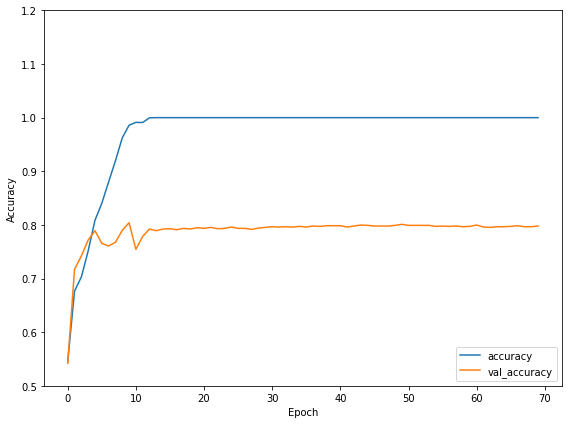

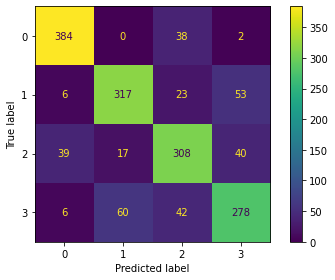

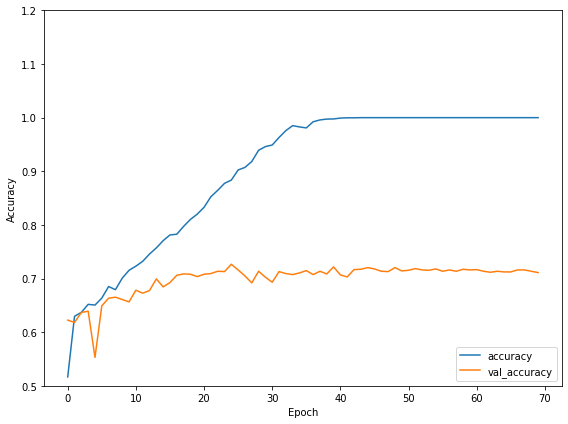

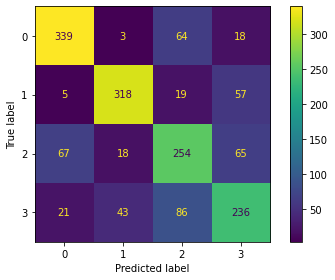

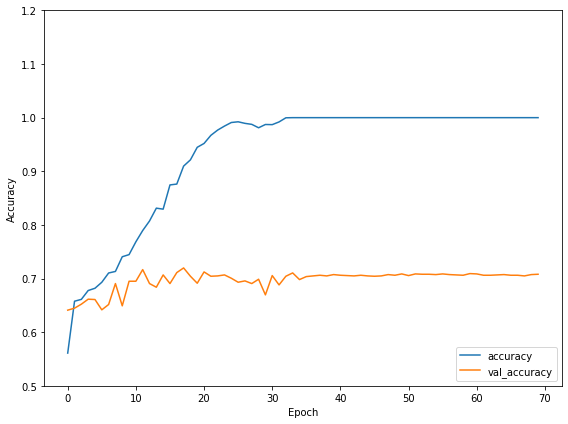

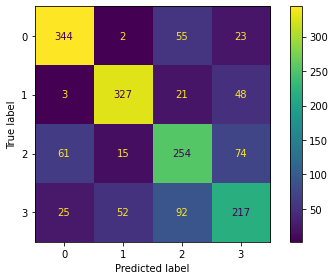

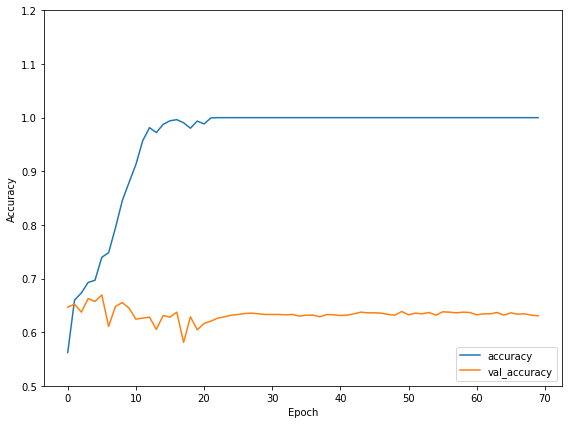

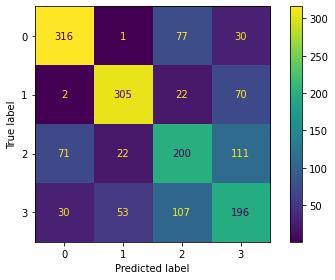

In [ ]:
for date in ["8_18", "9_02", "9_09", "9_20"]:
  for img_size in [32, 64, 128]:
    # load the data
    data = np.load(f'/content/drive/MyDrive/Colab Notebooks/twri_rgb_6832_cotton_{img_size}x{img_size}_{date}.npy')
    labels = pd.read_csv('labels_rgb.csv')
    y_label = labels['class'].values

    # remove the filler type
    new_data_without_filler = np.zeros((5376, img_size, img_size, 3)) # defult was 32,32,3
    new_y_label_without_filler = np.zeros(5376, dtype=int)
    i = 0
    for idx, val in enumerate(y_label):
      if val != 0:
        new_data_without_filler[i] = data[idx]
        new_y_label_without_filler[i] = y_label[idx]
        i+=1
    data = new_data_without_filler
    y_label = new_y_label_without_filler - 1

    # split the data and normalization
    train_images, test_images, train_labels, test_labels = train_test_split(data, y_label, test_size=0.3, random_state=42)
    train_images, test_images = train_images / 255.0, test_images / 255.0
    class_names = ['rainfed', 'fully irrigated', 'percent deficit', 'time delay']

    # set up the model and train
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(4))
    # model.summary()
    # compile the model
    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=70,
                      validation_data=(test_images, test_labels))

    # plot and save the image
    plt.figure(figsize=(8,6))
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1.2])
    plt.legend(loc='lower right')
    save_fig(f"Training and validation accuracy for {img_size} x {img_size} at {date} with four classes")


    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
    predictions = probability_model.predict(test_images)
    pred = np.argmax(predictions, axis=1)

    # save the confusion matrix image
    tf.math.confusion_matrix(test_labels, pred)
    ConfusionMatrixDisplay.from_predictions(test_labels, pred)
    save_fig(f"Confusion matrix for {img_size} x {img_size} at {date} with four classes")

    # save the precision and recall information to .txt files

    precision_recall_fscore_support(test_labels, pred, labels=[0, 1])
    #target_names = ['class 0', 'class 1', 'class 2', 'class 3']
    target_names = ['rainfed', 'fully irrigated', 'percent deficit', 'time delay']
    print(classification_report(test_labels, pred, target_names=target_names))
    report = classification_report(test_labels, pred, target_names=target_names)
    report_path = f"Precision and Recall for {img_size} x {img_size} at {date} with four classes.txt"
    text_file = open(report_path, "w")
    n = text_file.write(report)
    text_file.close()


